# Introduction to Regression with Nural Network in Tensorflow

There are many defination for regression problem:
predecting a numerical variable based on some other combination of variables, even shorter... predecting number

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating some data to view and fit

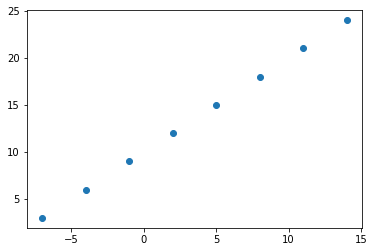

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [ ]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output Shapes

In [ ]:
# Create a demo tensor for our housing price predection problem
house_info = tf.constant(['bedroom','bathroom','garrage'])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garrage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape,output_shape

((8,), (8,))

In [ ]:
# Turn our Numpy Array into tensors
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow
1. Creating model - define the input and output layers, as well as hidden layers in deep learning
2. Compiling a model - define the loss function (function which tell us how wrong our model is) and it optemizer(tells our model how to improve our model) and evaluation matrics (What we can interpret the preformance of our model)
3. Fitting a model - letting model try to find patterns between X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with squential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X , y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_preds = model.predict(X)

In [ ]:
y_preds + 11

array([[ 5.83458 ],
       [ 8.069759],
       [10.30494 ],
       [12.54012 ],
       [14.7753  ],
       [17.01048 ],
       [19.24566 ],
       [21.48084 ]], dtype=float32)

In [ ]:
model.evaluate(X,y)

1/1 [==============================] - 0s 101ms/step - loss: 10.8423 - mae: 10.8423


[10.842289924621582, 10.842289924621582]

## Improving Our Model

We can imporve our model by altering the steps we take while creating our model
1. **Creating a model** :- Increase the number of hidden layers,within each layers, change the activation function
2. **Compiling a model** :- Here we might change the optimizer function or perhaps the **learning rate** of the optimization function
3. **Fitting Model** :- Here w might fit our model for more **epochs** or on more data  

In [ ]:
# Let's rebuild our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 436ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2215 - mae: 11.2215
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2210 - mae: 11.2210
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2206 - mae: 11.2206
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2201 - mae: 11.2201
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2197 - mae: 11.2197
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2192 - mae: 11.2192
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2188 - mae: 11.2188
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2183 - mae: 11.2183
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2179 - mae: 11.2179
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - 

In [ ]:
y_preds = model.predict(X)

In [ ]:
y_preds

array([[-4.6161313],
       [-2.6335037],
       [-0.6508759],
       [ 1.3317518],
       [ 3.3143795],
       [ 5.2970076],
       [ 7.2796354],
       [ 9.262263 ]], dtype=float32)

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

## Evaluating a Model

In Practice, a typical workflow all have to go through when building a nural networl:-

```
Build a model -> fit it -> evaluate it -> tweak a model-> fit it -> evaluate it -> tweak it -> fit it.... 
```


In [ ]:
 # Make a bigger data set

 X = tf.range(-100,100,4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make a label dataset

y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

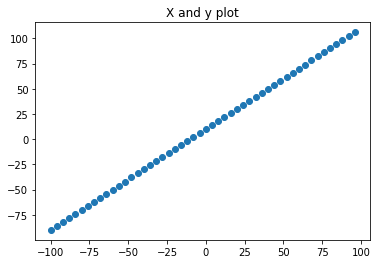

In [ ]:
# Visualize a data
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.title('X and y plot');

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2)

In [ ]:
X_train,y_train

(array([  68,   -8,   44,  -20,  -36,   96,  -92,  -48,  -56,   84,    0,
         -84,  -44,   76,   -4,  -72,  -24,   40,   36,  -76,   32, -100,
         -64,  -68,  -16,  -96,    4,  -88,    8,   64,   12,  -60,   52,
         -28,   20,   60,   24,  -80,  -12,   80], dtype=int32),
 array([ 78,   2,  54, -10, -26, 106, -82, -38, -46,  94,  10, -74, -34,
         86,   6, -62, -14,  50,  46, -66,  42, -90, -54, -58,  -6, -86,
         14, -78,  18,  74,  22, -50,  62, -18,  30,  70,  34, -70,  -2,
         90], dtype=int32))

In [ ]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [ ]:
X_train,X_test,y_train,y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([  68,   -8,   44,  -20,  -36,   96,  -92,  -48,  -56,   84,    0,
         -84,  -44,   76,   -4,  -72,  -24,   40,   36,  -76,   32, -100,
         -64,  -68,  -16,  -96,    4,  -88,    8,   64,   12,  -60,   52,
         -28,   20,   60,   24,  -80,  -12,   80], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 56, -52,  88, -32,  92,  16, -40,  48,  28,  72], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ 78,   2,  54, -10, -26, 106, -82, -38, -46,  94,  10, -74, -34,
         86,   6, -62, -14,  50,  46, -66,  42, -90, -54, -58,  -6, -86,
         14, -78,  18,  74,  22, -50,  62, -18,  30,  70,  34, -70,  -2,
         90], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 66, -42,  98, -22, 102,  26, -30,  58,  38,  82], dtype=int32)>)

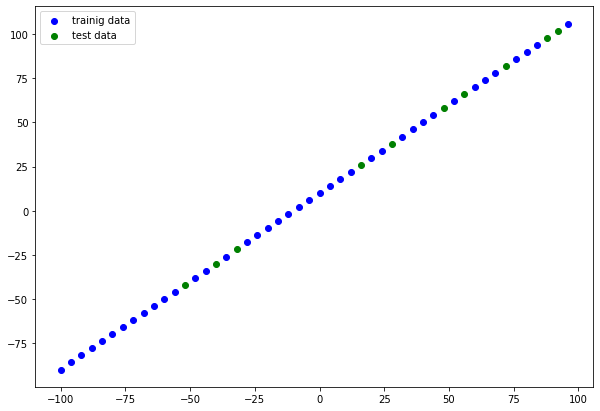

In [ ]:
plt.figure(figsize=(10,7));

plt.scatter(X_train,y_train,c="b",label="trainig data")
plt.scatter(X_test,y_test,c="g",label="test data")
plt.legend();

In [ ]:
# Let's Create our nueral network model

# 1. Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Complie model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the data

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9172 - mae: 9.9172
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2105 - mae: 11.2105
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 19.5644 - mae: 19.5644
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0134 - mae: 9.0134
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4153 - mae: 10.4153
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1762 - mae: 11.1762
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3418 - mae: 10.3418
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8773 - mae: 8.8773
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3529 - mae: 9.3529
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0171 - mae: 9.0171
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

## Visualizing the model  

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create a model on based upon input shape

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1,input_shape=[1],name="output_layer")
],name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,verbose=0)

In [ ]:
model.predict(X_test)

array([[ 15.492969],
       [-14.389336],
       [ 24.346985],
       [ -8.855575],
       [ 25.453735],
       [  4.425449],
       [-11.069079],
       [ 13.279466],
       [  7.745704],
       [ 19.919975]], dtype=float32)

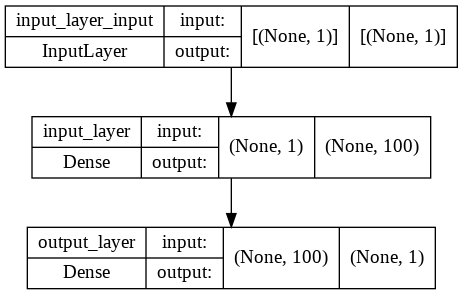

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

## Visualizing our Model Predection

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 66, -42,  98, -22, 102,  26, -30,  58,  38,  82], dtype=int32)>

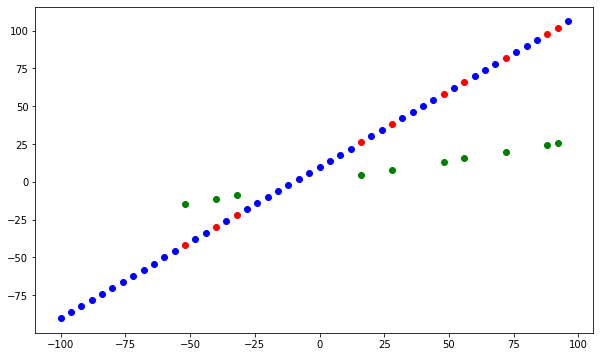

In [ ]:
def plot_pred(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predections=y_preds
):
  plt.figure(figsize=(10,6))

  plt.scatter(train_data,train_labels,c="b")

  plt.scatter(test_data,test_labels,c="r")

  plt.scatter(test_data,predections,c="g");

plot_pred()

## Evaluting our model predictions with regression Metrics

In [ ]:
#Evaluate the model on test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 92ms/step - loss: 41.9022 - mae: 41.9022


[41.90217208862305, 41.90217208862305]

In [ ]:
tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=41.902172>

In [ ]:
y_true = np.random.randint(0, 2, size=(2, 3))
y_pred = np.random.random(size=(2, 3))
loss = tf.keras.losses.mean_absolute_error(y_true, y_pred)
y_true,y_pred

(array([[1, 0, 0],
        [0, 1, 1]]), array([[0.77246721, 0.27502855, 0.51063652],
        [0.77857389, 0.81824182, 0.93765313]]))

In [ ]:
# Calculating Mean Square Error
tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2236.32>

In [ ]:
def mae(test_data=y_test,predection=y_preds):
  """
  This Function Take the test_data which is true value and
  predection data and returns back mean absolute error
  """
  return tf.keras.metrics.mean_absolute_error(test_data,tf.squeeze(predection))

def mse(test_data=y_test,predection=y_preds):
  """
  This Function Take the test_data true value and
  predection data and returns back mean squared error
  """
  return tf.keras.metrics.mean_squared_error(test_data,tf.squeeze(predection))

## Saving our Model 

In [ ]:
# save model using saved model format

model.save("best_model_saved_format")

INFO:tensorflow:Assets written to: best_model_saved_format/assets


In [ ]:
model.save("best_model_format.h5")

In [ ]:
model_saved_format = tf.keras.models.load_model('/content/best_model_saved_format')
model_saved_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_preds=model.predict(X_test)
y_saved_preds=model_saved_format.predict(X_test)

In [ ]:
mae(y_test,y_preds),mae(y_test,y_saved_preds)

(<tf.Tensor: shape=(), dtype=float32, numpy=41.902172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=41.902172>)

# A Large Example

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
insurance_cost_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv',low_memory=False)

In [ ]:
insurance_cost_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insurance_cost_df['sex'].replace({'female':0,'male':1},inplace=True)
insurance_cost_df['smoker'].replace({'yes':0,'no':1},inplace=True)
insurance_cost_df['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3},inplace=True)

In [ ]:
X = insurance_cost_df.drop(columns=['charges'])
y = insurance_cost_df['charges']

In [ ]:
X.head(10)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2
5,31,0,25.740,0,1,1
6,46,0,33.440,1,1,1
7,37,0,27.740,3,1,2
8,37,1,29.830,2,1,3
9,60,0,25.840,0,1,2


In [ ]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=3500,verbose=0)

In [ ]:
y_preds=model.predict(X_test)

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(268, 6), dtype=float32, numpy=
array([[4668.0464, 8479.083 , 6297.0776, 8479.083 , 8479.083 , 8553.808 ],
       [5041.6777, 8553.808 , 6359.1   , 8479.083 , 8479.083 , 8479.083 ],
       [4966.952 , 8479.083 , 5522.5405, 8404.356 , 8553.808 , 8404.356 ],
       ...,
       [4294.416 , 8479.083 , 5543.838 , 8553.808 , 8479.083 , 8329.63  ],
       [6312.0234, 8553.808 , 5635.7505, 8329.63  , 8553.808 , 8479.083 ],
       [5116.404 , 8479.083 , 6700.9727, 8329.63  , 8479.083 , 8329.63  ]],
      dtype=float32)>

In [ ]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8588.5938 - mae: 8588.5938


[8588.59375, 8588.59375]